In [1]:
# Installing Packages

!pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Emmanuel Cerrer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the CSV File

df = pd.read_csv(r"C:\Users\Emmanuel Cerrer\Desktop\suicide_rate.csv")
df.head()

,country_name,year,suicide_mortality_rate,gdp,political_stability
0,Afghanistan,2000,4.36,"3,521,418,059.92",-2.44
1,Afghanistan,2002,4.26,"3,825,701,439.00",-2.04
2,Afghanistan,2003,4.24,"4,520,946,818.55",-2.20
3,Afghanistan,2004,4.23,"5,224,896,718.68",-2.30
4,Afghanistan,2005,4.16,"6,203,256,538.71",-2.07


In [5]:
# Checking Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_name            3816 non-null   object 
 1   year                    3816 non-null   int64  
 2   suicide_mortality_rate  3816 non-null   float64
 3   gdp                     3816 non-null   object 
 4   political_stability     3816 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 149.2+ KB


In [6]:
# Fixing Data Types

df["country_name"] = df["country_name"].astype("string")
df["gdp"] = df["gdp"].str.replace(",", "").astype(float)

In [7]:
# Summary Statistics

df.describe()

,year,suicide_mortality_rate,gdp,political_stability
count,3816.000000,3816.000000,3.816000e+03,3816.000000
mean,2010.944182,9.434895,3.628903e+11,-0.119617
std,6.116242,7.287785,1.518610e+12,0.975730
min,2000.000000,0.000000,7.619839e+07,-3.310000
25%,2006.000000,4.490000,7.058250e+09,-0.730000
50%,2011.000000,7.300000,2.613358e+10,-0.025000
75%,2016.000000,12.740000,1.729101e+11,0.680000
max,2021.000000,53.060000,2.368117e+13,1.760000


In [8]:
# Checking of Missing Values

df.isnull().sum()

country_name              0
year                      0
suicide_mortality_rate    0
gdp                       0
political_stability       0
dtype: int64

In [21]:
# Filtering Rows

## Filtering by High Suicide Mortality Rate
df[df["suicide_mortality_rate"] > 10]

## Filtering by Low GDP
df[df["gdp"] < 10_000_000_000]

## Filtering by Low Political Stability Score
df[df["political_stability"] < -1]

,country_name,year,suicide_mortality_rate,gdp,political_stability
0,Afghanistan,2000,4.36,3.521418e+09,-2.44
1,Afghanistan,2002,4.26,3.825701e+09,-2.04
2,Afghanistan,2003,4.24,4.520947e+09,-2.20
3,Afghanistan,2004,4.23,5.224897e+09,-2.30
4,Afghanistan,2005,4.16,6.203257e+09,-2.07
...,...,...,...,...,...
3801,Zimbabwe,2007,13.21,5.291951e+09,-1.11
3802,Zimbabwe,2008,13.56,4.415703e+09,-1.21
3803,Zimbabwe,2009,12.36,9.665816e+09,-1.17
3804,Zimbabwe,2010,13.56,1.204160e+10,-1.10


In [29]:
# Grouping Data (Summaries)

## Average Suicide Rate per Country
df.groupby("country_name")["suicide_mortality_rate"].mean()

## Average GDP per Country 
df.groupby("country_name")["gdp"].mean()

## Average Political Stability Score per Country
df.groupby("country_name")["political_stability"].mean()

## Average Suicide Rate per Year
df.groupby("year")["suicide_mortality_rate"].mean()

## Average GDP per Year 
df.groupby("year")["gdp"].mean()

## Average Political Stability Score per Year
df.groupby("year")["political_stability"].mean()

year
2000   -0.037709
2002   -0.044246
2003   -0.096703
2004   -0.132253
2005   -0.132418
2006   -0.127486
2007   -0.123880
2008   -0.127814
2009   -0.140984
2010   -0.143005
2011   -0.142717
2012   -0.134918
2013   -0.133716
2014   -0.128197
2015   -0.133242
2016   -0.120387
2017   -0.124696
2018   -0.133039
2019   -0.115056
2020   -0.117111
2021   -0.118994
Name: political_stability, dtype: float64

In [31]:
# Sorting Results

df.sort_values("suicide_mortality_rate", ascending=False)

,country_name,year,suicide_mortality_rate,gdp,political_stability
2899,Russian Federation,2000,53.06,2.597101e+11,-1.40
2900,Russian Federation,2002,50.72,3.454705e+11,-0.72
2064,Lithuania,2000,50.40,1.155070e+10,0.43
2901,Russian Federation,2003,49.35,4.303474e+11,-1.19
2065,Lithuania,2002,47.58,1.428229e+10,0.89
...,...,...,...,...,...
134,Antigua and Barbuda,2009,0.00,1.386519e+09,0.72
135,Antigua and Barbuda,2010,0.00,1.298348e+09,0.90
136,Antigua and Barbuda,2011,0.00,1.287359e+09,0.96
3654,St. Vincent and the Grenadines,2018,0.00,8.843296e+08,0.82


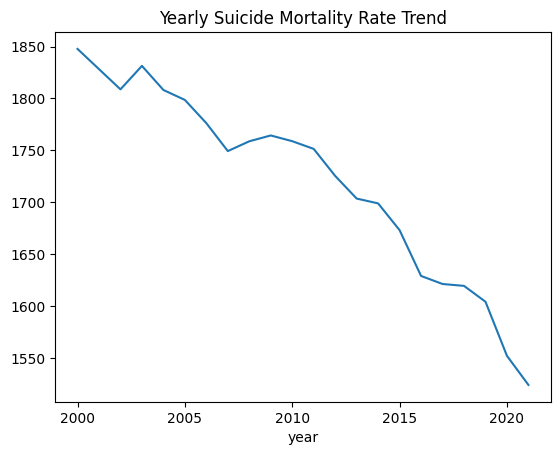

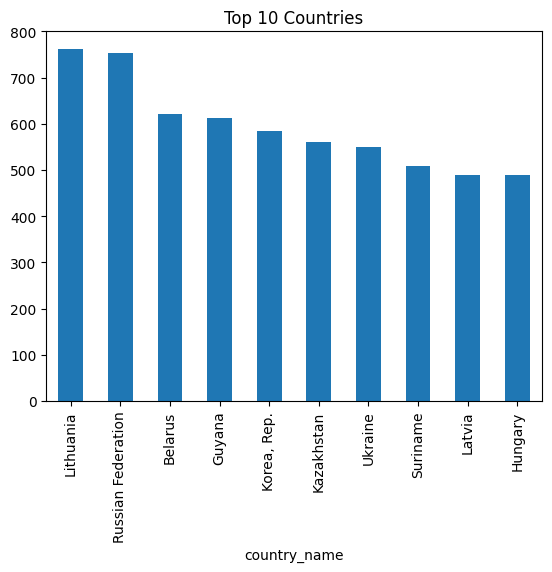

In [33]:
# Plotting Charts

## Line Charts (Trend)
df.groupby("year")["suicide_mortality_rate"].sum().plot(kind="line")
plt.title("Yearly Suicide Mortality Rate Trend")
plt.show()

## Bar Chart (Top Countries)
df.groupby("country_name")["suicide_mortality_rate"].sum().nlargest(10).plot(kind="bar")
plt.title("Top 10 Countries")
plt.show()

In [34]:
# Detecting Countries with High Suicide Mortality Rates

df["zscore_suicide"] = (df["suicide_mortality_rate"] - df["suicide_mortality_rate"].mean()) / df["suicide_mortality_rate"].std()
high_suicide = df[df["zscore_suicide"] > 3]
high_suicide

,country_name,year,suicide_mortality_rate,gdp,political_stability,zscore_suicide
399,Belarus,2000,39.50,1.273678e+10,0.14,4.125410
400,Belarus,2002,40.32,1.459490e+10,0.30,4.237927
401,Belarus,2003,40.29,1.782544e+10,0.69,4.233811
402,Belarus,2004,40.37,2.314157e+10,0.16,4.244788
403,Belarus,2005,40.52,3.021009e+10,0.36,4.265370
...,...,...,...,...,...,...
2911,Russian Federation,2013,32.83,2.292470e+12,-0.74,3.210180
2912,Russian Federation,2014,32.61,2.059242e+12,-0.94,3.179993
3198,Slovenia,2000,31.93,2.015919e+10,0.89,3.086686
3553,Ukraine,2000,36.06,3.237508e+10,-0.41,3.653388


In [37]:
# Simple Machine Learning (Multiple Linear Regression)

from sklearn.linear_model import LinearRegression

X = df[["gdp", "political_stability"]]
y = df[["suicide_mortality_rate"]]

model = LinearRegression()
model.fit(X,y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[5.06833997e-13 2.41251414e-26]]
Intercept: [9.25097005]
